Train Score: 0.88 - Test Score: 0.87 - Hyperparameters: {'copy_X': True, 'fit_intercept': True}
Train Score: 0.77 - Test Score: 0.76 - Hyperparameters: {'copy_X': True, 'fit_intercept': False}
Train Score: -17.63 - Test Score: 0.87 - Hyperparameters: {'copy_X': False, 'fit_intercept': True}
Train Score: 0.77 - Test Score: 0.76 - Hyperparameters: {'copy_X': False, 'fit_intercept': False}
{'copy_X': True, 'fit_intercept': True}
RMSE: 958.3551082151776


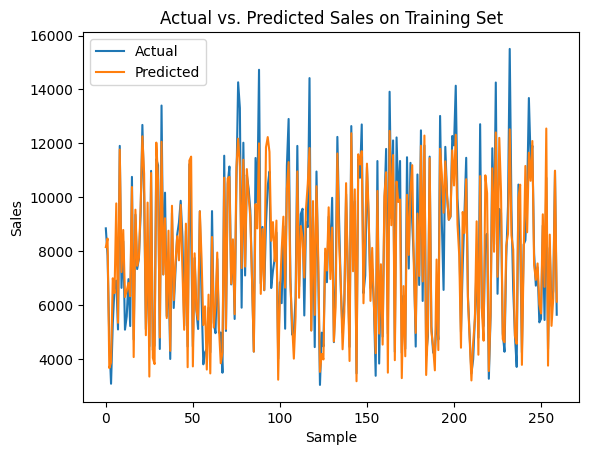

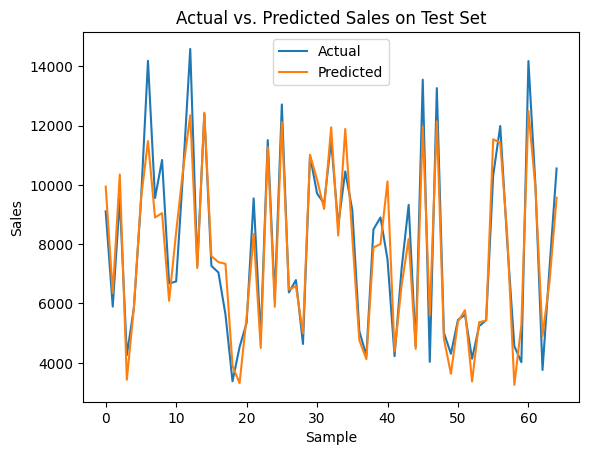

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('data-sets/alcohol_sales.csv')

# Convert date column to datetime object
data['date'] = pd.to_datetime(data['date'])

# Set date column as the index of the DataFrame
data = data.set_index('date')

# Split data into features and target
X = data.index.values.astype(float).reshape(-1, 1)
y = data['sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up hyperparameters to search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(LinearRegression(), param_grid=param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

# Print cross-validation results
cv_results = grid_search.cv_results_
for mean_train_score, mean_test_score, params in zip(cv_results['mean_train_score'], cv_results['mean_test_score'], cv_results['params']):
    print(f"Train Score: {mean_train_score:.2f} - Test Score: {mean_test_score:.2f} - Hyperparameters: {params}")

# Print best hyperparameters
print(grid_search.best_params_)

# Train the model with best hyperparameters
model = LinearRegression(**grid_search.best_params_)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Plot actual vs. predicted values on training set during each epoch
plt.plot(y_train.values, label='Actual')
plt.plot(model.predict(X_train), label='Predicted')
plt.title('Actual vs. Predicted Sales on Training Set')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot actual vs. predicted values on test set
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Sales on Test Set')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.show()
